In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib

plt.style.use('fivethirtyeight')
matplotlib.rcParams.update({'font.size': 14})
matplotlib.rcParams['image.cmap'] = 'viridis'

In [11]:
st_df = pd.read_pickle('../data/st_trails_df')
st_df.columns

Index(['id', 'name', 'url', 'length', 'description', 'directions', 'city',
       'region', 'country', 'lat', 'lon', 'difficulty', 'features', 'rating',
       'thumbnail'],
      dtype='object')

In [16]:
view_cols = set(st_df.columns).difference(set(['directions', 'thumbnail','city', 'country', 'features', \
                                               'rating_rounded', 'length_rounded', 'url']))
not_cols = ['directions', 'thumbnail','city', 'country', 'features', \
                                               'rating_rounded', 'length_rounded', 'url']
view_cols2 = ['id', 'name', 'length', 'description', 'region', 'lat', 'lon', 'difficulty', 'rating', 'description_length']
st_df[view_cols2][st_df['region']=="Colorado"]

,id,name,length,description,region,lat,lon,difficulty,rating,description_length
99,3,Apex Park,8.0,"From the Heritage Square parking lot, take Ape...",Colorado,39.71646,-105.20924,advanced,4.16,785
100,4,Bear Creek Regional Park,6.0,This place has some good hills and wide trails...,Colorado,38.82509,-104.85969,beginner,2.86,339
101,5,Black Forest Regional Park,4.0,This place doesn't have a whole lot to offer b...,Colorado,39.01355,-104.73789,beginner,2.44,383
102,6,Blodgett,3.0,Trail starts as a fireroad and climbs. You can...,Colorado,38.94890,-104.88610,intermediate,3.27,1050
103,7,Captain Jack's,5.0,The ride up High Drive is about a mile and com...,Colorado,38.79908,-104.88353,intermediate,4.29,668
...,...,...,...,...,...,...,...,...,...,...
285,5678,Butter Knife,13.0,From the trailhead across the road from the pa...,Colorado,39.00289,-108.60760,intermediate,4.67,866
286,5681,Bookcliff,20.0,Mountain biking north of the airport on modera...,Colorado,39.14486,-108.54569,beginner,3.00,744
291,7124,Mesa Top Trail,8.0,Mesa Top is an out-and-back high altitude trai...,Colorado,39.02858,-108.04853,None,0.00,210
292,7125,Flowing Park Loop,14.0,Flowing Park (#715.1A) makes a lariat with the...,Colorado,38.95548,-108.10302,intermediate,3.00,793


In [ ]:
st_df['features'].unique()

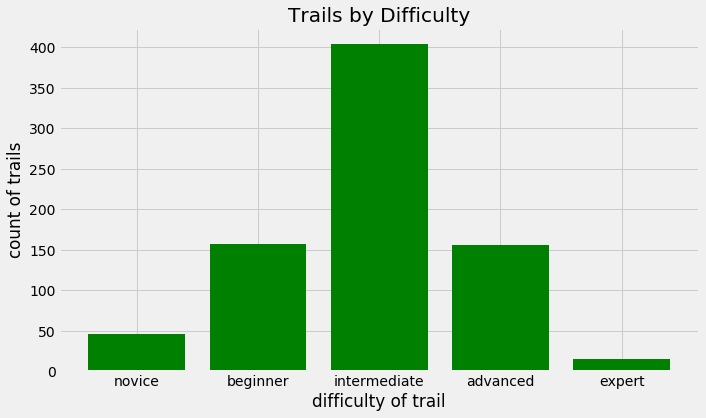

In [17]:
y = st_df[['difficulty', 'id']].groupby(by='difficulty').count().reset_index()
order = np.array(['novice', 'beginner', 'intermediate', 'advanced', 'expert', None])
order_dict = {difficulty:np.argwhere(order==difficulty)[0][0] for difficulty in order}
y['order'] = np.zeros(len(y))
for i, diffy in enumerate(order):
    y.loc[y['difficulty']==diffy, 'order'] = order_dict[diffy]
y = y.sort_values(by='order')

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(y.shape[0])
labels = y['difficulty']
ax.bar(x, y['id'], color='g')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('count of trails')
ax.set_xlabel('difficulty of trail')
ax.set_title('Trails by Difficulty')
fig.tight_layout(pad=1)
fig.savefig('../images/st_Trails_by_difficulty_ordered.png')

In [13]:
st_df['rating_rounded'] = st_df['rating'].apply(lambda x: np.round(float(x), 1))
st_df['rating_rounded']

0      4.2
1      4.0
2      4.4
3      4.0
4      3.8
      ... 
950    0.0
951    0.0
952    0.0
953    0.0
954    0.0
Name: rating_rounded, Length: 955, dtype: float64

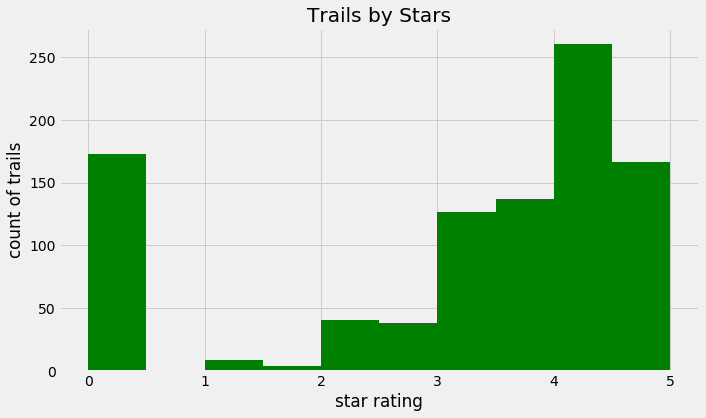

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
dummy = np.array([1, 1, 2, 2, 1, 5, 5, 5])
ax.hist(st_df['rating_rounded'].values, color='g')
ax.set_ylabel('count of trails')
ax.set_xlabel('star rating')
ax.set_title('Trails by Stars')

fig.tight_layout(pad=1)
fig.savefig('../images/st_Trails_by_stars.png')

In [14]:
st_df['length_rounded'] = st_df['length'].apply(lambda x: np.round(float(x), 0))
len(st_df['length_rounded'].unique())

57

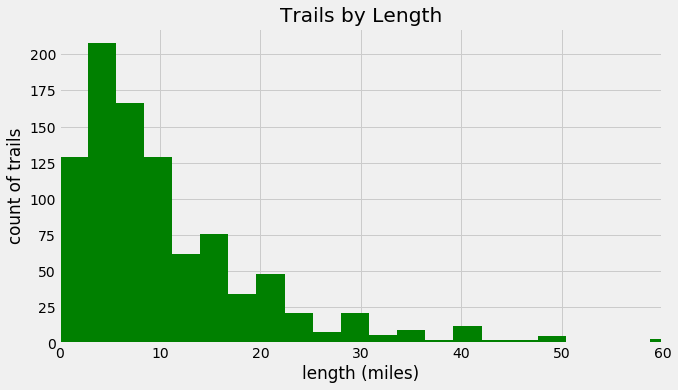

In [160]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(st_df['length_rounded'], bins=50, color='g')
ax.set_xlim(0, 60)
ax.set_ylabel('count of trails')
ax.set_xlabel('length (miles)')
ax.set_title('Trails by Length')

fig.tight_layout(pad=2)
# fig.savefig('../images/st_trails_by_length.png')
# st_df['length_rounded'].max()

top words hist ... word cloud...  stop words
PCA chart? clusters?
n-grams
stop words
CV vs TF-IDF

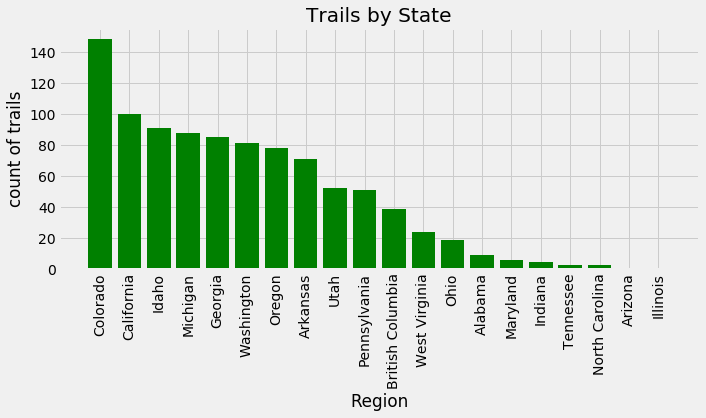

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))
y = st_df['region'].value_counts()
x = np.arange(len(y))
labels = y.index
ax.bar(x, y, color='g')
plt.xticks(x, labels, rotation='vertical')
#ax.set_xticks(x)
#ax.set_xticklabels(labels)
ax.set_ylabel('count of trails')
ax.set_xlabel('Region')
ax.set_title('Trails by State')

fig.tight_layout(pad=1)
fig.savefig('../images/st_trails_by_state.png')

In [15]:
st_df['description_length'] = st_df['description'].apply(lambda x: len(x))
len(st_df[st_df['description_length']<=40]['description'])
st_df[(st_df['description_length']<=40)]['description']

36                                       epic
66                               Flow & views
73        Off the face from the top of Dimple
93                              Fall line fun
94      Gravel surface.  Repurposed rail bed.
95      Gravel surface.  Repurposed rail bed.
117       this trail is tough...  be prepared
289                    Great mountain biking.
320      Rails to trails, very boring to me. 
353    Rolling hills singletrack. Hidden gem.
368                         Rocky singletrack
383                                Rail Trail
384        Railroad Grade Turned Singletrack!
398                     new trail in new park
419                    Fun sandy areas though
472      Network of trails.\r\n(Varied types)
549                             Short but fun
570                             Great trails.
578         Plenty of mountain biking trails.
580                       Nice biking trails.
581                    Great mountain biking.
589       Great system of Intermed

In [189]:
st_df[st_df['region'].map(lambda x: 'Colorado' in x)][['name','region', 'description']]

,name,region,description
99,Apex Park,Colorado,"From the Heritage Square parking lot, take Ape..."
100,Bear Creek Regional Park,Colorado,This place has some good hills and wide trails...
101,Black Forest Regional Park,Colorado,This place doesn't have a whole lot to offer b...
102,Blodgett,Colorado,Trail starts as a fireroad and climbs. You can...
103,Captain Jack's,Colorado,The ride up High Drive is about a mile and com...
...,...,...,...
285,Butter Knife,Colorado,From the trailhead across the road from the pa...
286,Bookcliff,Colorado,Mountain biking north of the airport on modera...
291,Mesa Top Trail,Colorado,Mesa Top is an out-and-back high altitude trai...
292,Flowing Park Loop,Colorado,Flowing Park (#715.1A) makes a lariat with the...


In [190]:
st_df[st_df['name'].map(lambda x: 'Captain' in x)][['name','region', 'description']]

,name,region,description
103,Captain Jack's,Colorado,The ride up High Drive is about a mile and com...
290,Captain Ahab,Utah,Ahab is a little under 4 miles of singletrack ...


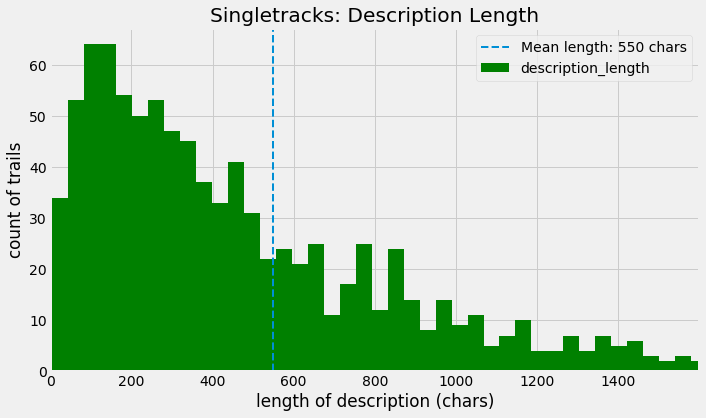

In [167]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(st_df['description_length'], bins=150, color='g')
avg = round(st_df['description_length'].mean())
ax.axvline(x=avg, linestyle='--', linewidth=2, label=f'Mean length: {avg} chars')
ax.set_xlim(0, 1600)
ax.set_xticks(np.arange(0, 1600, 200))
ax.set_ylabel('count of trails')
ax.set_xlabel('length of description (chars)')
ax.set_title('Singletracks: Description Length')
ax.legend()

fig.tight_layout(pad=1)
fig.savefig('../images/st_description_length.png')

In [72]:
st_df.to_pickle('../data/st_trails_df_2')

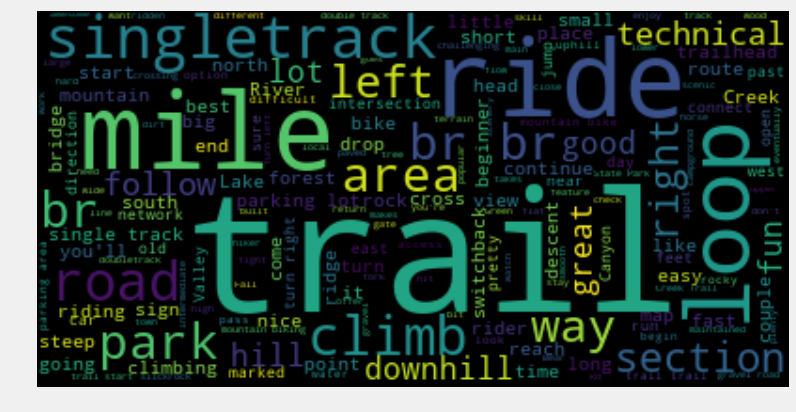

In [163]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from gensim.parsing.preprocessing import STOPWORDS
from nltk.corpus import stopwords

nltk_stopwords = set(stopwords.words('english'))
gensim_stopwords = STOPWORDS
# my_stopwords = set(['trail', 'trails', 'loop','br', \
#                     'mile', 'miles','ride', 'area', 'route', 'way', \
#                     'feature', 'section', 'ride', 'riding'\
#                     'north', 'south', 'east', 'west', 'right', 'left'])
# all_stopwords = my_stopwords.union(nltk_stopwords.union(gensim_stopwords))

text = ''
for desc in st_df[st_df['description_length']>=40]['description']:
    text += desc
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off');

In [165]:
wordcloud.to_file("../images/st_wordcloud1.png")

In [19]:
run st_nlp.py

In [121]:
diff_dict = {'novice': 'limegreen', 'beginner': 'deepskyblue', \
                                              'intermediate':'mediumblue', 'advanced':'black', \
                                              'expert':'black', None:'white'}



In [20]:
y = st_df_with_desc['difficulty'].map(diff_dict)
diff_dict
y.value_counts()

In [21]:
from matplotlib.lines import Line2D

legend_elements2 = []
for difficulty, color in diff_dict.items():
    line = Line2D([0], [0], marker='o', color='w', label=difficulty,
                          markerfacecolor=color, markersize=10)
    legend_elements2.append(line)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.scatter(pca_tfidf[:, 0], pca_tfidf[:, 1], c=y)
ax.set_title("PCA Components: colored by trail difficulty")
ax.set_xlabel("1st eigenvector (PC1)")
ax.set_ylabel("2nd eigenvector (PC2)")
ax.legend(handles=legend_elements2, facecolor='w', title='Trail difficulty')

# fig.savefig('../images/st_PCA_difficulty.png');

In [22]:
colors = ['red', 'orange', 'yellow', 'limegreen', 'blue', 'purple', 'black', 'white', 'cyan', 'pink', 'peru']
state_dict = {state: colors[ind%11] for ind, state in enumerate(st_df_with_desc['region'].unique())}
y2 = st_df_with_desc['region'].map(state_dict)
state_dict

In [23]:
legend_elements2 = []
for state, color in state_dict.items():
    line = Line2D([0], [0], marker='o', color='w', label=state,
                          markerfacecolor=color, markersize=10)
    legend_elements2.append(line)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.scatter(pca_tfidf[:, 0], pca_tfidf[:, 1], c=y2)
ax.set_title("PCA Components: colored by State")
ax.set_xlabel("1st eigenvector (PC1)")
ax.set_ylabel("2nd eigenvector (PC2)")
ax.legend(handles=legend_elements2, facecolor='w', title='State')

# fig.savefig('../images/st_PCA_region.png');